# Lab | Cleaning numerical data

# 1-Import the necessary libraries.


2-Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
(i.e. customer_df = pd.readcsv(""))



3-First, look at its main features (head, shape, info).


4-Rename the columns so they follow the PE8 (snake case).


5-Fix the data types of any other column/columns as you might see necessary.
Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa).
For eg., if there's a column with year values like 2020, 2021, 2022, etc.,
this column might be read as numerical by python, but you would want to use that column as categorical data.
Hint: One thing you can try is to change date column to datetime format.
    
    
6-Plot a correlation matrix, and comment on what you observe.


7-Plot every continuous variable. Comment what you can see in the plots.


8-Do the same with the categorical variables 
(be careful, you may need to change the plot type to one better suited for continuous data!).
Comment what you can see in the plots.
You should also delete the column customer_id before you can try to use a for loop on all the categorical columns.
Discuss why is deleting the column customer_id required.
Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
    
    
9-Look for outliers in the continuous variables.
(Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.


10-Check all columns for NaN values. Decide what (if anything) you will need to do with them.



In [3]:
# libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [4]:
df = pd.read_csv("C:/Users/Mimzd/Desktop/ML and statistics/we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in df]
df.columns = new_cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
# date-column to date-time format
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [15]:
#Check NaNs Total
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [18]:
# Check NaNs (Percentage)
df.isna().sum()/len(df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [19]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,46254.048664,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,22200.666227,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,33889.500000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33893.250000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [20]:
#  Too many zeros. 
df['income'].value_counts()

33889.5    2317
95697.0      12
27972.0       7
25370.0       7
61108.0       7
           ... 
36529.0       1
25859.0       1
38179.0       1
70190.0       1
21941.0       1
Name: income, Length: 5694, dtype: int64

In [21]:
# zeros with median
median_income=df['income'].median(skipna=True)
df['income']=df.income.mask(df.income==0,median_income)

In [22]:
df['income'].value_counts()

33889.5    2317
95697.0      12
27972.0       7
25370.0       7
61108.0       7
           ... 
36529.0       1
25859.0       1
38179.0       1
70190.0       1
21941.0       1
Name: income, Length: 5694, dtype: int64

# Lab | Cleaning categorical data

# 1-Import the necessary libraries if you are starting a new notebook.


2-Load the csv. Use the variable customer_df as customer_df = pd.read_csv().


3-What should we do with the customer_id column?


4-Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()


5-Plot every categorical variable. What can you see in the plots?
Note that in the previous lab you used a bar plot to plot categorical data,
with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
However, this time you will try a different plot.
This time in each plot for the categorical variable you will have,
each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis


6-For the categorical data, check if there is any data cleaning that need to perform.
Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column.
Discuss if this information might in some way be used for data cleaning.

In [23]:
#continues from the lab above
numericals = df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [24]:
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [25]:
discrete = [m for m in numericals if (len(numericals[m].unique()) < (numericals.shape[0] * 0.01))]
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [26]:
continuous = list(numericals.drop(columns = discrete).columns)
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [28]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
categorical = df.select_dtypes(object)
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [31]:
categorical_columns = [m for m in categorical if (len(categorical[m].unique()) < (numericals.shape[0] * 0.01))]
categorical_columns


['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [33]:
categorical_df=df[categorical_columns]
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [34]:
continuous_df = numericals.drop(columns = discrete)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [35]:
discrete_df = numericals[discrete]
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


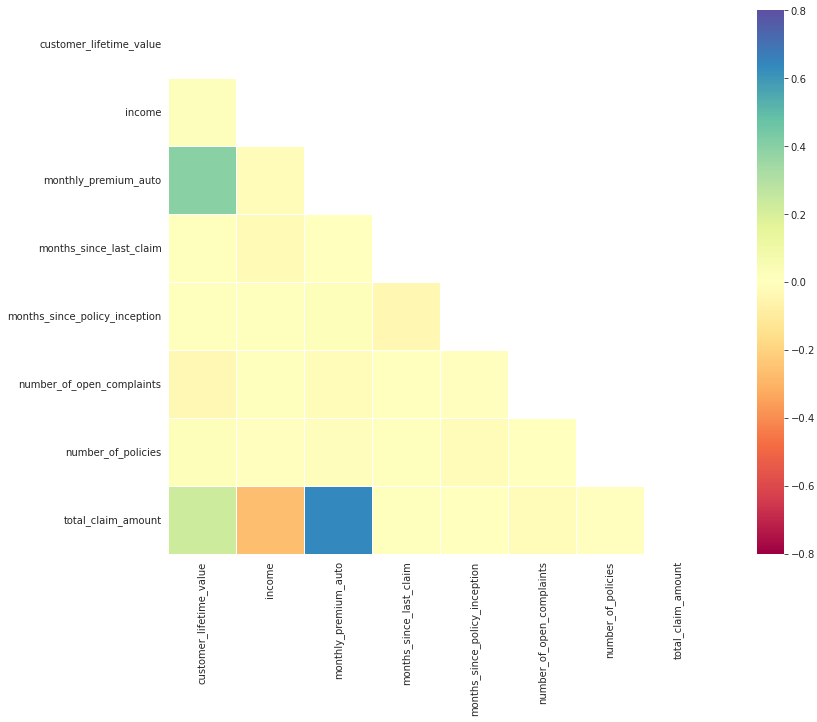

In [36]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="Spectral",
                     vmax = 0.8, vmin = -0.8)

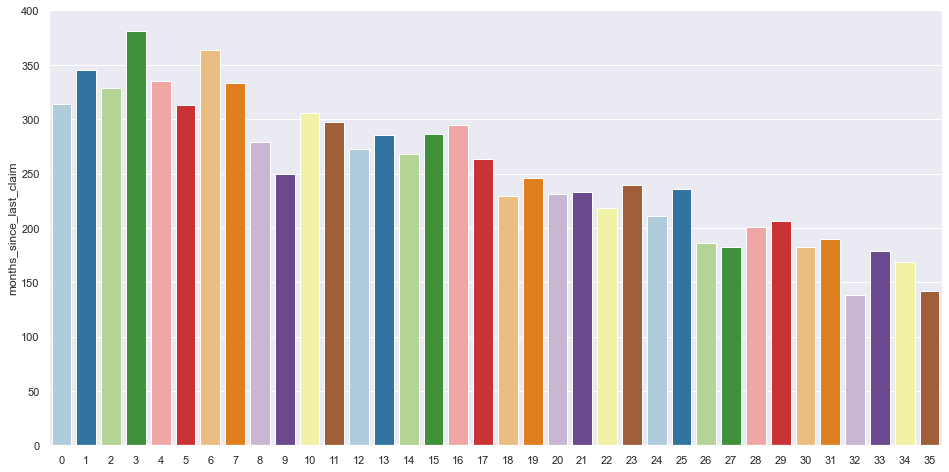

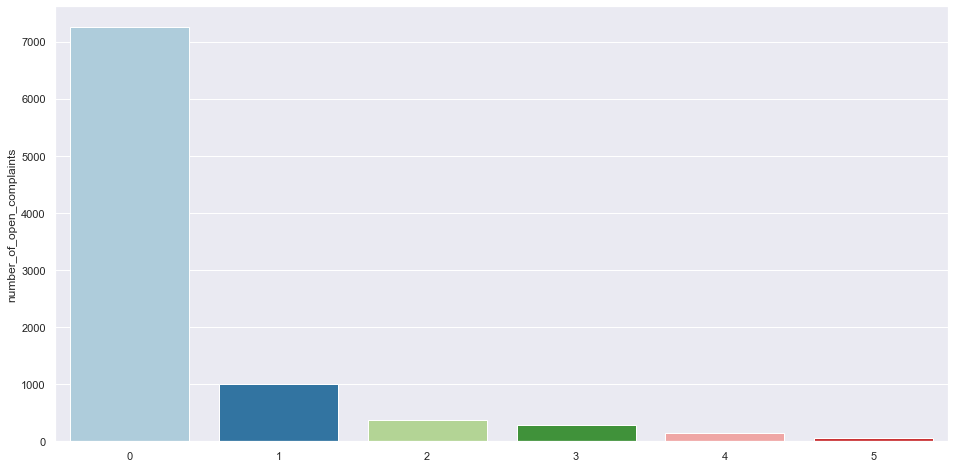

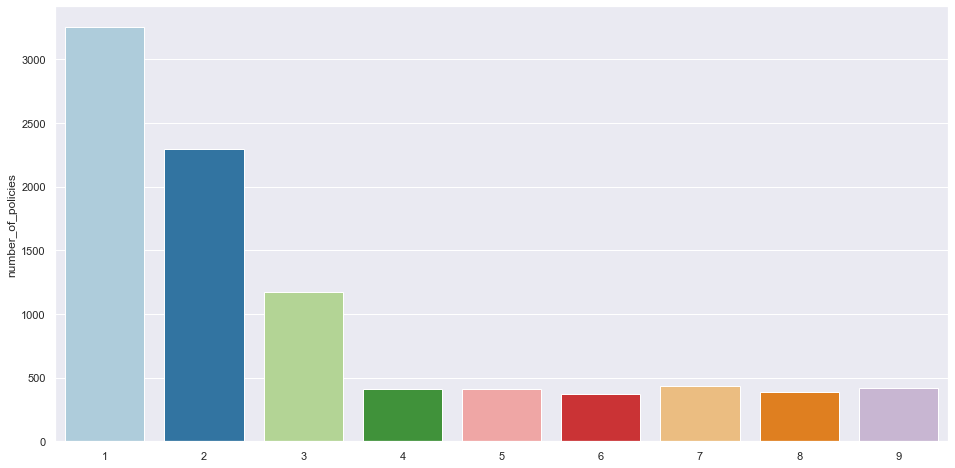

In [37]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for m, col in enumerate(df):
        plt.figure(m)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts(),palette = "Paired")
        
    plt.show()
df_bar(discrete_df)

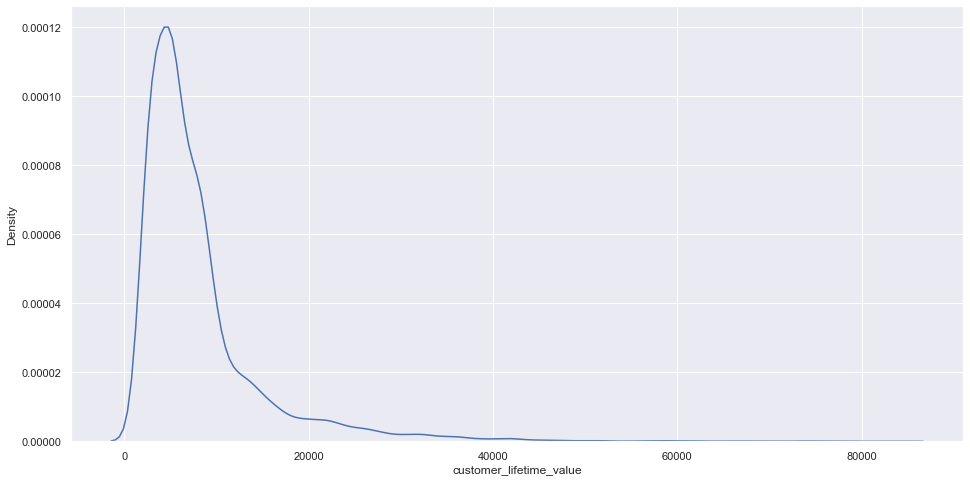

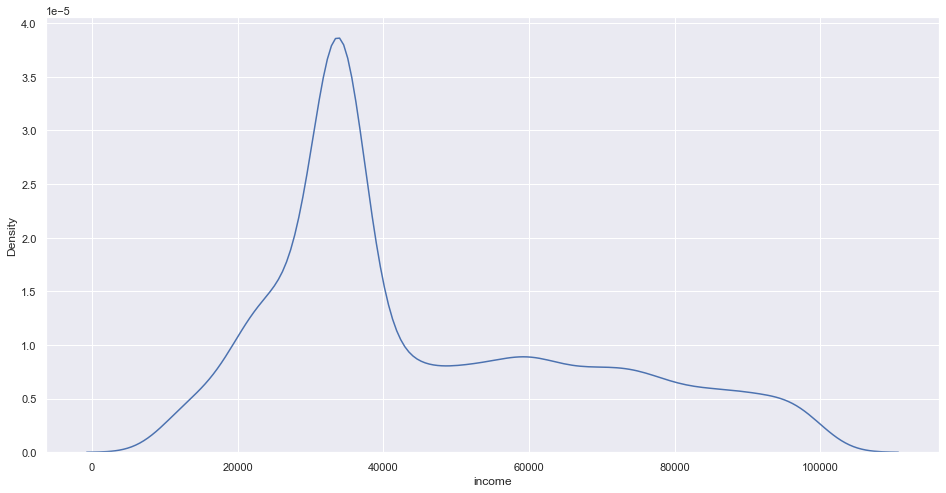

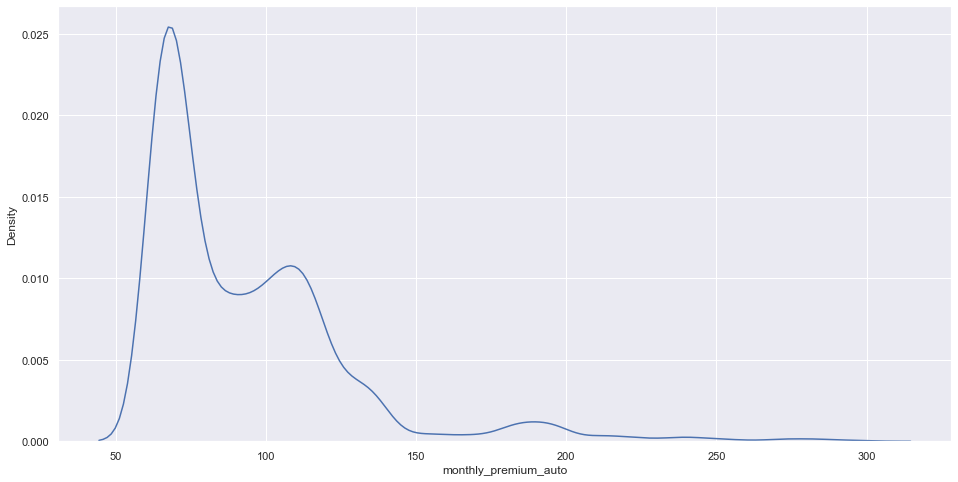

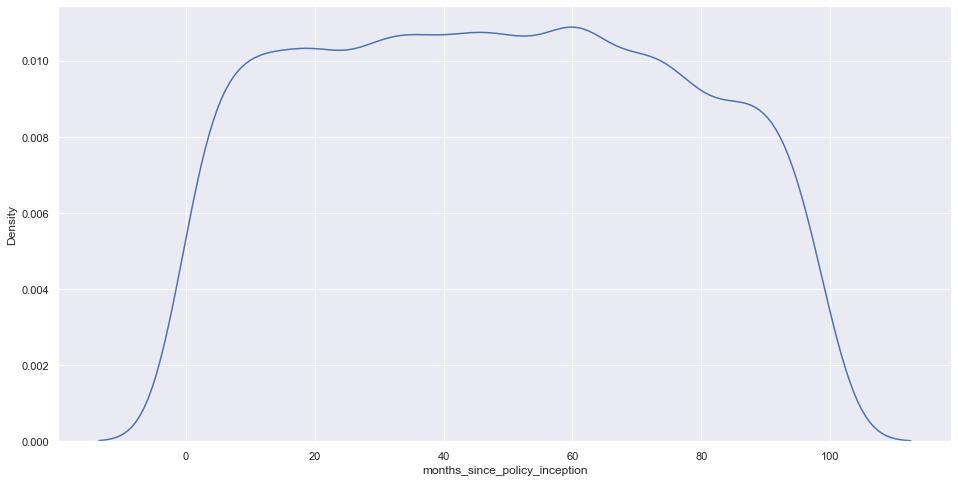

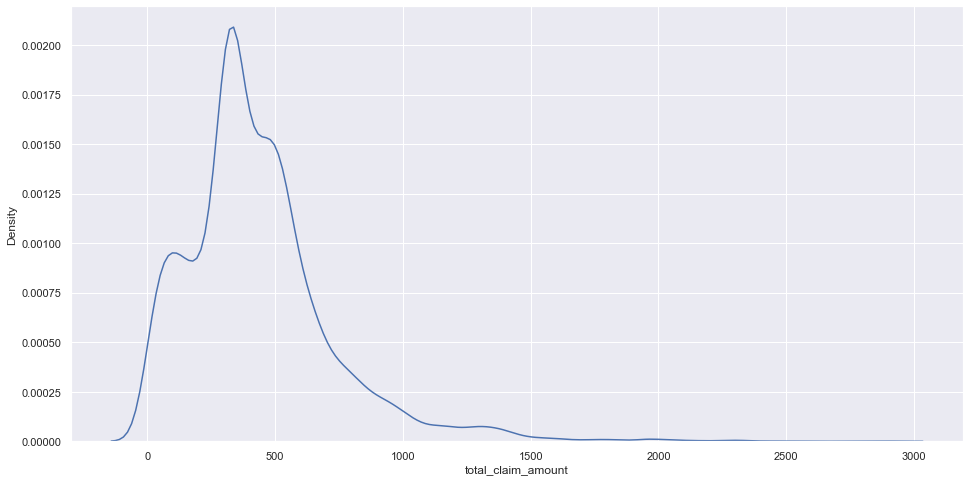

In [38]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for m, col in enumerate(df):
        plt.figure(m)
        sns.distplot(df[col], [m])
        custom_palette = sns.color_palette("Paired")
    plt.show()
df_hist(continuous_df)


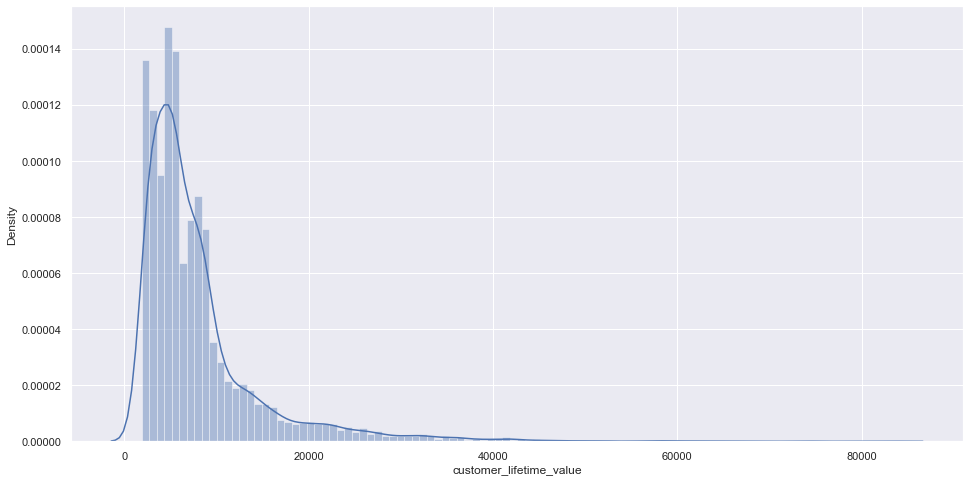

In [39]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);
sns.set(style='dark',)
plot = sns.distplot(color='purple')

In [40]:
continuous_df["customer_lifetime_value"].value_counts()

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

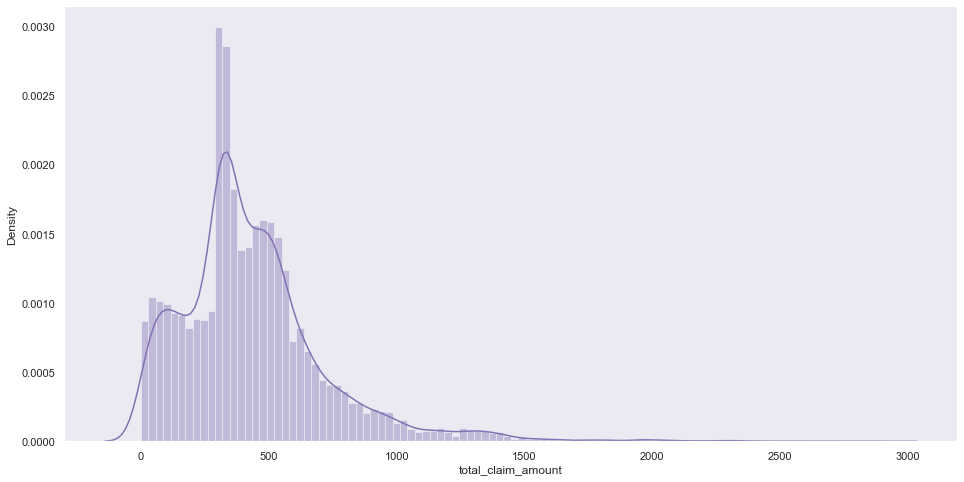

In [41]:
sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);

In [42]:
def funtion(x):
    if len(x.value_counts()) < 300: 
        return 'discrete'
    else:
        return 'continuous'
numericals.apply(funtion)

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto               discrete
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [53]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

<AxesSubplot:>

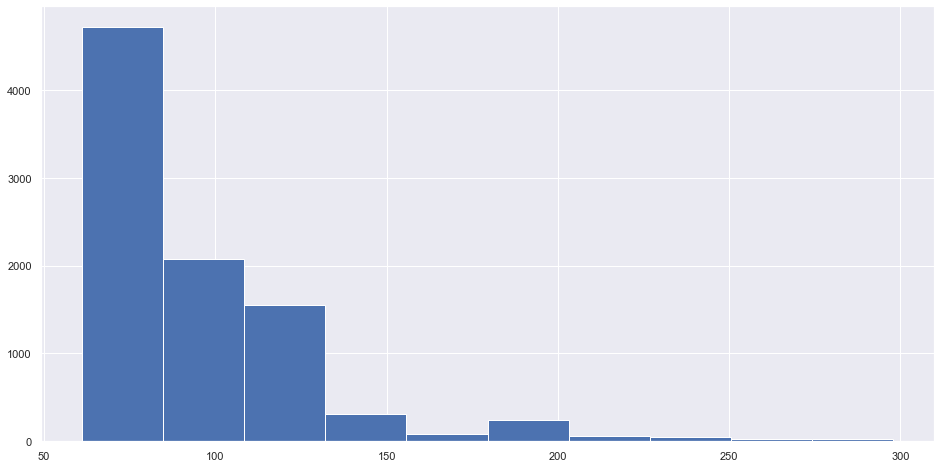

In [54]:
continuous_df['monthly_premium_auto'].hist()

<AxesSubplot:>

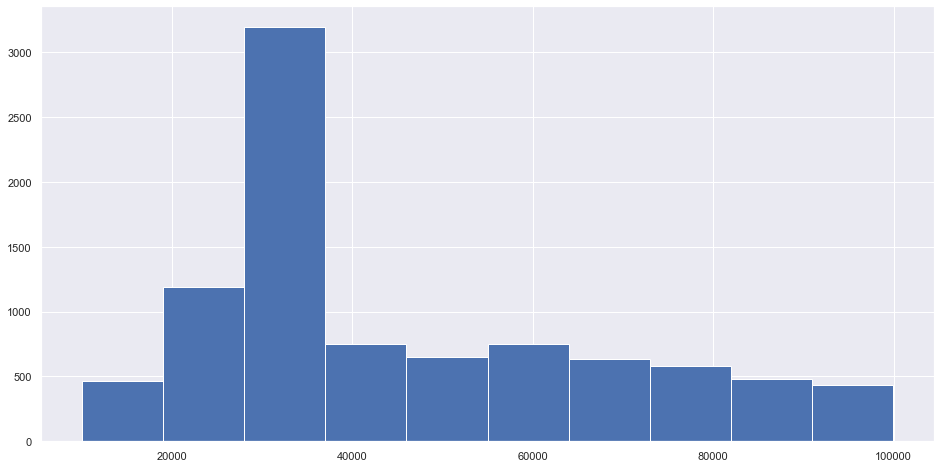

In [55]:
continuous_df['income'].hist()

<AxesSubplot:>

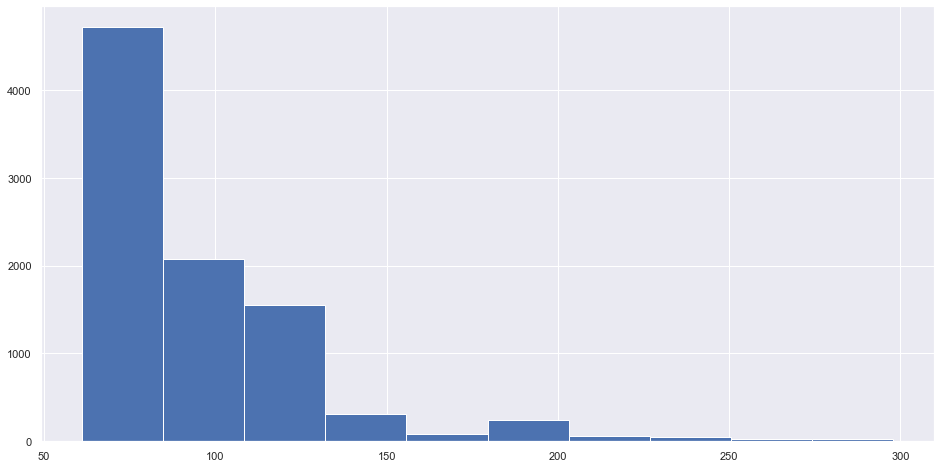

In [56]:
continuous_df['monthly_premium_auto'].hist()

In [61]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [57]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: total_claim_amount, Length: 5106, dtype: int64

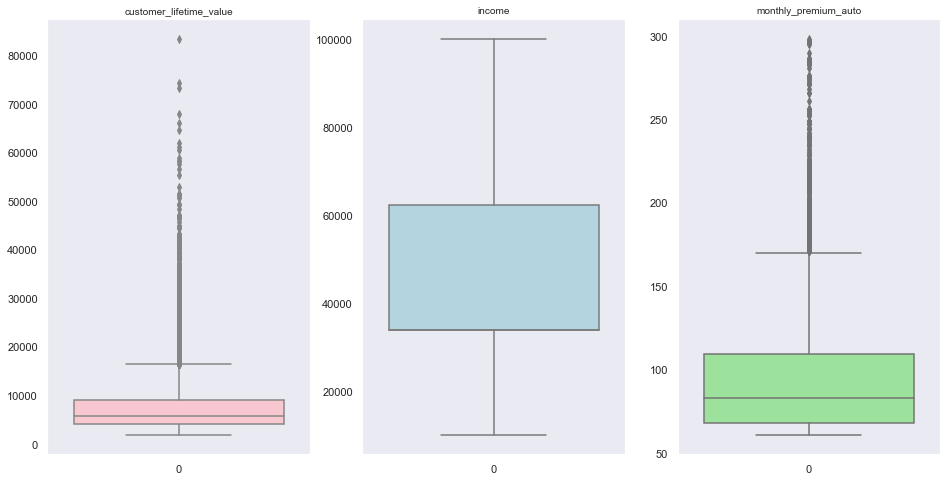

In [58]:
box_colors = ['pink', 'lightblue', 'lightgreen']

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 10)
plt.show();

#  
  **monthly_premium_auto:**
        There are a lot of outliers. If we compare this feature with education we see 'Doctors' have less outliers its last quartile is shorter --> sns.boxplot(x='monthly_premium_auto',y='education',data=customer_df )
        
        
  **income:** 
    the minimum and the Q1 are the same. There is a negative skew, the mean is higher than the median. No outliers.
    
    
  **customer lifetime value:** 
    we have lots of outliers. We should scale it or make another dataset with the outliers. The median is below 10000. It is positive skewed so, the median is higher than the mean.

# 
Customer_liftime_value and Totalclaim_amount seems to be very similar distributed. 
We will check them to decide what to do with these values, but initally 

In [62]:
continuous_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,46254.048664,93.219291,48.064594,434.088794
std,6870.967608,22200.666227,34.407967,27.905991,290.500092
min,1898.007675,10037.000000,61.000000,0.000000,0.099007
25%,3994.251794,33889.500000,68.000000,24.000000,272.258244
50%,5780.182197,33893.250000,83.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,99.000000,2893.239678


# Lab Feature extraction

# 

1. Open the categoricals variable we created before.
2. categoricals = data.select_dtypes(np.object)
 categoricals.head()
3. Plot all the categorical variables with the proper plot. What can you see?
4. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
5. Plot time variable. Can you extract something from it?

In [64]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [65]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

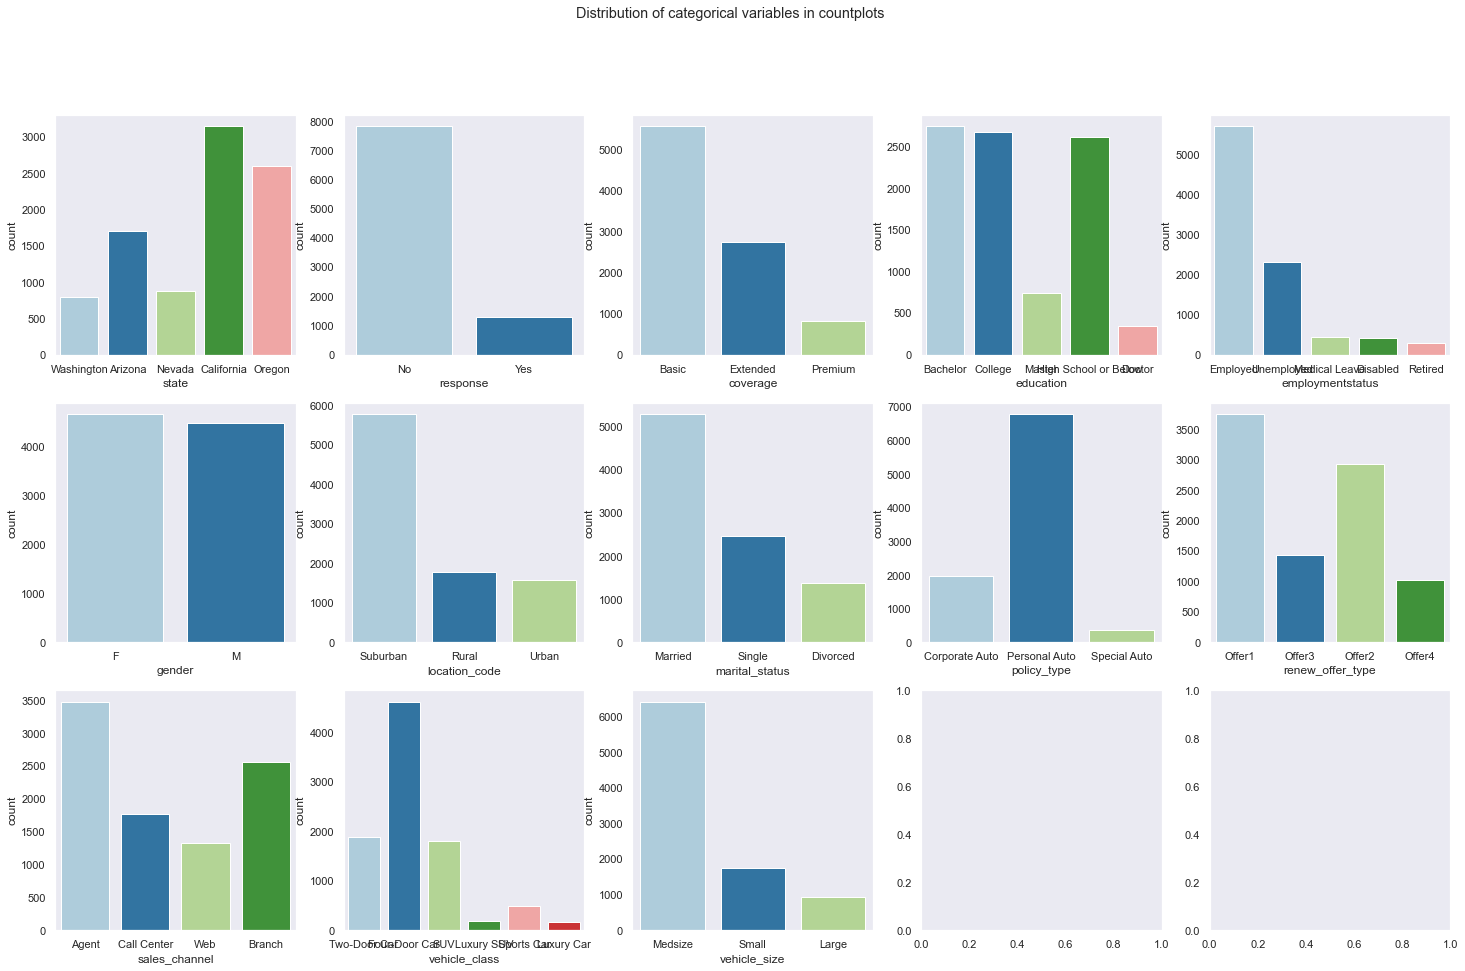

In [127]:
fig, axes = plt.subplots(3,5,  figsize=(25, 15))

fig.suptitle('Distribution of categorical variables in countplots')

sns.countplot(ax=axes[0,0],data= categorical, x= 'state', palette = "Paired")
sns.countplot(ax=axes[1,1],data= categorical, x= 'location_code', palette = "Paired")
sns.countplot(ax=axes[0,4],data= categorical, x= 'employmentstatus', palette = "Paired")
sns.countplot(ax=axes[1,2],data= categorical, x= 'marital_status', palette = "Paired")
sns.countplot(ax=axes[1,0],data= categorical, x= 'gender', palette = "Paired")
sns.countplot(ax=axes[0,1],data= categorical, x= 'response', palette = "Paired")
sns.countplot(ax=axes[0,2],data= categorical, x= 'coverage', palette = "Paired")
sns.countplot(ax=axes[0,3],data= categorical, x= 'education', palette = "Paired")
sns.countplot(ax=axes[1,3],data= categorical, x= 'policy_type', palette = "Paired")
sns.countplot(ax=axes[1,4],data= categorical, x= 'renew_offer_type', palette = "Paired")
sns.countplot(ax=axes[2,0],data= categorical, x= 'sales_channel', palette = "Paired")
sns.countplot(ax=axes[2,1],data= categorical, x= 'vehicle_class', palette = "Paired")
sns.countplot(ax=axes[2,2],data= categorical, x= 'vehicle_size', palette = "Paired")

In [128]:
#4 - We discover overlap between "Policy" and "Policy type." 
#We already dealt with this in the past (our categorical data frame only retains the policy type column).

In [129]:
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

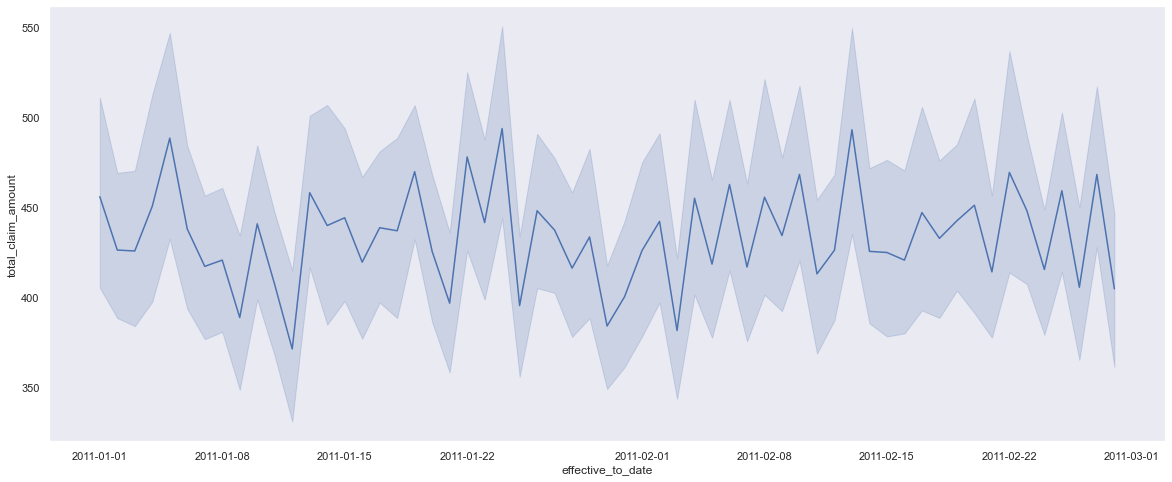

In [136]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='effective_to_date', y='total_claim_amount',markers=True)